In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
df=pd.read_excel('sales_data_sample.xlsx',sheet_name="saledata")
df.head(5)

,ORDERNUMBER,QUANTITYORDERED,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,COUNTRY,DEALSIZE,Discount,Profit
0,10107,30,2,2871.00,2003-02-24,Shipped,USA,Small,0.00,41.9136
1,10121,34,5,2765.90,2003-05-07,Shipped,France,Small,0.00,219.5820
2,10134,41,2,3884.34,2003-07-01,Shipped,France,Medium,0.00,6.8714
3,10145,45,6,3746.70,2003-08-25,Shipped,USA,Medium,0.45,-383.0310
4,10159,49,14,5205.27,2003-10-10,Shipped,USA,Medium,0.20,2.5164


In [6]:
#kích thước dữ liễu (dòng,cột)
df.shape

(2823, 10)

In [7]:
#Hãy cho bik hóa đơn 10107 có bao nhieu dòng sản phẩm
df[df['ORDERNUMBER']==10107].shape

(8, 10)

In [8]:
df['COUNTRY'].value_counts()

COUNTRY
USA            1004
Spain           342
France          314
Australia       185
UK              144
Italy           113
Finland          92
Norway           85
Singapore        79
Canada           70
Denmark          63
Germany          62
Sweden           57
Austria          55
Japan            52
Belgium          33
Switzerland      31
Philippines      26
Ireland          16
Name: count, dtype: int64

In [9]:
df.loc[df['ORDERNUMBER']==10107]

,ORDERNUMBER,QUANTITYORDERED,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,COUNTRY,DEALSIZE,Discount,Profit
0,10107,30,2,2871.00,2003-02-24,Shipped,USA,Small,0.0,41.9136
54,10107,39,5,3896.49,2003-02-24,Shipped,USA,Medium,0.0,298.6855
80,10107,27,4,6065.55,2003-02-24,Shipped,USA,Medium,0.0,8.0352
240,10107,21,1,3036.60,2003-02-24,Shipped,USA,Medium,0.2,11.1944
804,10107,29,6,2055.23,2003-02-24,Shipped,USA,Small,0.0,6.2152
1466,10107,25,3,2845.75,2003-02-24,Shipped,USA,Small,0.2,-10.7973
1564,10107,38,7,3155.14,2003-02-24,Shipped,USA,Medium,0.0,17.7450
2173,10107,20,8,1858.00,2003-02-24,Shipped,USA,Small,0.8,-13.8960


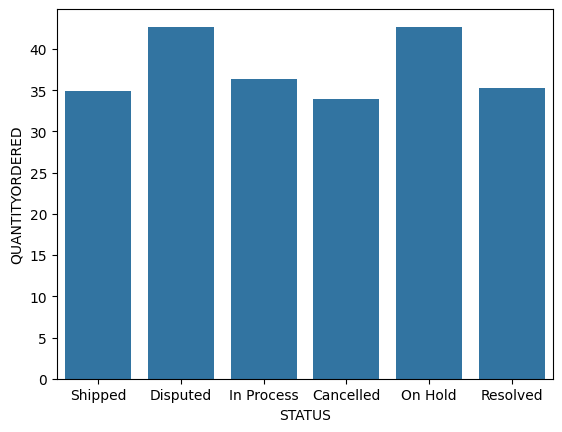

In [10]:
#nhìn hình
sns.barplot(x='STATUS',y='QUANTITYORDERED',data=df,errorbar=None)
plt.show()

In [11]:
#có mối liên hệ giữa trạng thái giao hàng(STATUS) và GIÁ trị đặt hàng(SALES) không?
import statsmodels.api as sm
from statsmodels.formula.api import ols

model=ols('SALES ~ STATUS',data=df).fit()
aov_table=sm.stats.anova_lm(model,typ=1)
aov_table

#PR(>F) là pplue so sánh  < 5% nếu nhở hơn là bác bỏ
#bác bỏ

,df,sum_sq,mean_sq,F,PR(>F)
STATUS,5.0,5.921801e+07,1.184360e+07,3.506652,0.003661
Residual,2817.0,9.514324e+09,3.377467e+06,NaN,NaN


In [12]:
import pandas as pd

# Giả sử df là DataFrame chứa dữ liệu
# Tính độ lệch chuẩn của SALES theo từng nhóm kích thước đặt hàng
std_sales = df.groupby("DEALSIZE")["SALES"].std()

# In kết quả
print(std_sales.sort_values())  # Sắp xếp để biết thứ tự tăng dần về độ ổn định


DEALSIZE
Small      577.183322
Medium    1047.090148
Large     1294.739895
Name: SALES, dtype: float64


In [13]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

# Giả sử df là DataFrame chứa dữ liệu, với cột 'SALES'
scaler = MinMaxScaler()
df['SALES_SCALED'] = scaler.fit_transform(df[['SALES']])

# Lấy giá trị từ index 50 đến 59
scaled_values = df.loc[50:59, 'SALES_SCALED']
print(scaled_values)


50    0.571492
51    0.142230
52    0.268965
53    0.846934
54    0.251044
55    0.169972
56    0.207757
57    0.346367
58    0.333417
59    0.233724
Name: SALES_SCALED, dtype: float64


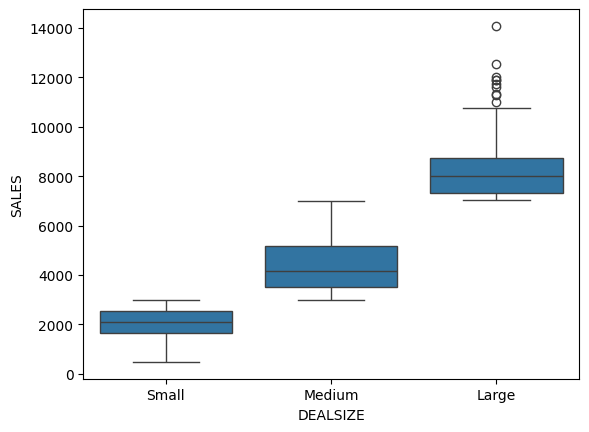

In [14]:
#Hãy cho bik biểu đồ 
sns.boxplot(x='DEALSIZE',y='SALES',data=df)
plt.show()


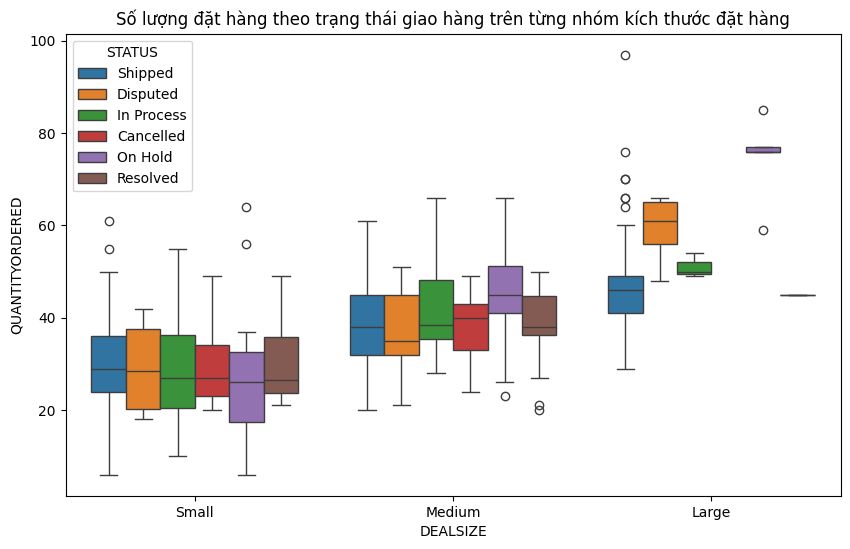

In [15]:

# Giả sử df chứa dữ liệu với các cột QUANTITYORDERED, STATUS, DEALSIZE

plt.figure(figsize=(10,6))
sns.boxplot(x="DEALSIZE", y="QUANTITYORDERED", hue="STATUS", data=df)
plt.title("Số lượng đặt hàng theo trạng thái giao hàng trên từng nhóm kích thước đặt hàng")
plt.show()


In [16]:
import pandas as pd
import scipy.stats as stats

# Giả sử df là DataFrame chứa dữ liệu
# Chia dữ liệu theo nhóm kích thước đặt hàng
small_group = df[df["DEALSIZE"] == "Small"]
medium_group = df[df["DEALSIZE"] == "Medium"]
large_group = df[df["DEALSIZE"] == "Large"]

# Kiểm định ANOVA cho từng nhóm kích thước đặt hàng
anova_small = stats.f_oneway(*[small_group[small_group["STATUS"] == status]["QUANTITYORDERED"] for status in small_group["STATUS"].unique()])
anova_medium = stats.f_oneway(*[medium_group[medium_group["STATUS"] == status]["QUANTITYORDERED"] for status in medium_group["STATUS"].unique()])
anova_large = stats.f_oneway(*[large_group[large_group["STATUS"] == status]["QUANTITYORDERED"] for status in large_group["STATUS"].unique()])

# In kết quả
print("ANOVA - Small Group:", anova_small)
print("ANOVA - Medium Group:", anova_medium)
print("ANOVA - Large Group:", anova_large)


ANOVA - Small Group: F_onewayResult(statistic=np.float64(0.79095582903934), pvalue=np.float64(0.5561588157372546))
ANOVA - Medium Group: F_onewayResult(statistic=np.float64(5.359406814629415), pvalue=np.float64(6.920325990972475e-05))
ANOVA - Large Group: F_onewayResult(statistic=np.float64(16.54002961915029), pvalue=np.float64(2.846200137667542e-11))


In [17]:
#Nếu sử dụng One Hot Encoding để số hóa dữ liễu DEALSIZE thì kết quả của dòng cuối cùng là bao nhiểu?
#đáp án: [0. 1. 0.]
from sklearn.preprocessing import OneHotEncoder
y = OneHotEncoder().fit_transform(df[['DEALSIZE']]).toarray()
print(y)

[[0. 0. 1.]
 [0. 0. 1.]
 [0. 1. 0.]
 ...
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 1. 0.]]


In [18]:
#Nếu sử dụng MAX absolute scaler cho SALES THÌ giá trị có index=100 đc scale thành bao nhiêu?
from sklearn.preprocessing import MaxAbsScaler
scaler=MaxAbsScaler()
scaler.fit(df[['SALES']])
scaled=scaler.transform(df[['SALES']])
scaled_df=pd.DataFrame(scaled,columns=df[['SALES']].columns)
print(scaled_df.iloc[100])

SALES    0.212325
Name: 100, dtype: float64


In [19]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, MaxAbsScaler

# Giả sử df đã có cột SALES
# Bước 1: Z-Score Scaling
scaler_z = StandardScaler()
sales_z = scaler_z.fit_transform(df[['SALES']])

# Bước 2: Max Absolute Scaling
scaler_maxabs = MaxAbsScaler()
sales_final = scaler_maxabs.fit_transform(sales_z)

# Lấy giá trị tại index = 100
scaled_value = sales_final[100][0]
print(f"Giá trị đã được scale tại index 100: {scaled_value}")


Giá trị đã được scale tại index 100: -0.053543911213573936


In [20]:
import pandas as pd

# Giả sử df chứa dữ liệu
# Đếm số dòng đặt hàng cho mỗi ORDERNUMBER
max_order_lines = df.groupby('ORDERNUMBER')['ORDERLINENUMBER'].count()

print(f"Số dòng đặt hàng nhiều nhất trong một đơn hàng: {max_order_lines}")


Số dòng đặt hàng nhiều nhất trong một đơn hàng: ORDERNUMBER
10100     4
10101     4
10102     2
10103    16
10104    13
         ..
10421     2
10422     2
10423     5
10424     6
10425    13
Name: ORDERLINENUMBER, Length: 307, dtype: int64


In [21]:
# Giả sử df chứa dữ liệu với cột SALES
scaler = StandardScaler()
df['SALES_ZSCALED'] = scaler.fit_transform(df[['SALES']])

# Tính giá trị đã scale của SALES = 10000
mean_sales = df['SALES'].mean()
std_sales = df['SALES'].std()
scaled_value = (10000 - mean_sales) / std_sales

print(f"Giá trị 10000 sau khi scale: {scaled_value}")

Giá trị 10000 sau khi scale: 3.499773630545118


In [22]:
#Hãy sắp xếp giảm dần theo mức độ lệch Sales sau khi đc transfrom lần lượt qua hàm log,sqrt,square, cube rpot
import numpy as np
print(df['SALES'].skew())
print(np.log(df['SALES']).skew())
print(np.sqrt(df['SALES']).skew())
print(np.square(df['SALES']).skew())
print(np.cbrt(df['SALES']).skew())  


1.161076000881289
-0.2021742362869817
0.47281500087876144
2.915766495908139
0.25086487312083416


In [23]:
import numpy as np
from scipy.stats import kurtosis

# Giả sử đây là dữ liệu giá trị đặt hàng của các sản phẩm


# Tính độ nhọn
kurt_value = kurtosis(df['SALES'], fisher=True)  # Fisher=True: Tính theo chuẩn Fisher (trừ 3)

print(f"Độ nhọn (Kurtosis): {kurt_value}")


Độ nhọn (Kurtosis): 1.7873782707746377


0.7679976616615047


[]

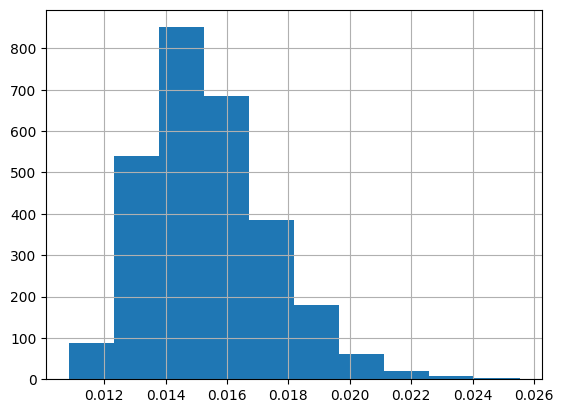

In [24]:
#Hãy tính giá trị lệch của SALES sau khi được transfrom qua hàm f(x)=1/(log(x)^2+1)
def fx(x):
    return 1/(np.log(x)**2+1)
sales_trans=fx(df['SALES'])
print(sales_trans.skew())   
sales_trans.hist()
plt.plot()

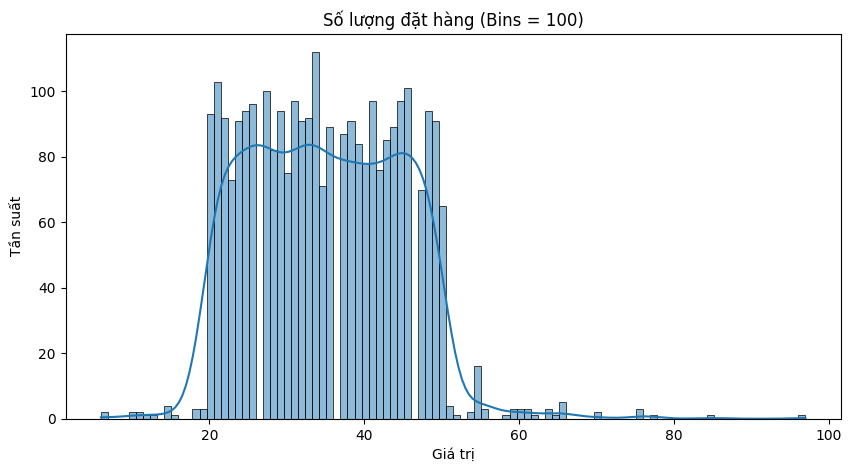

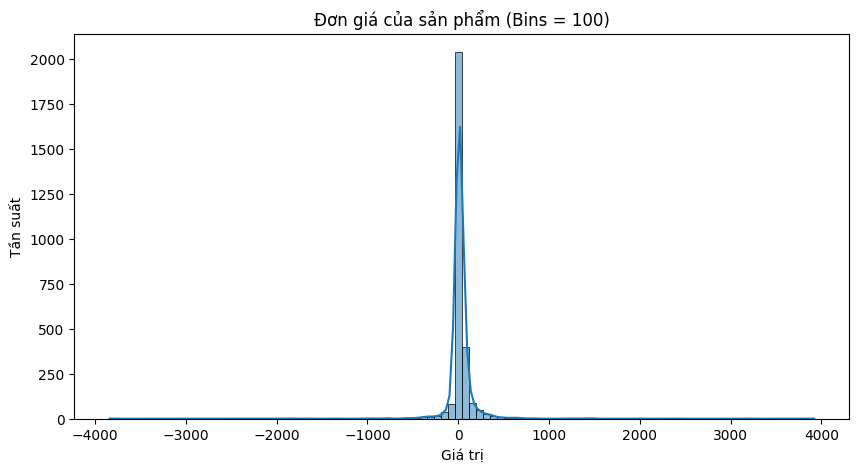

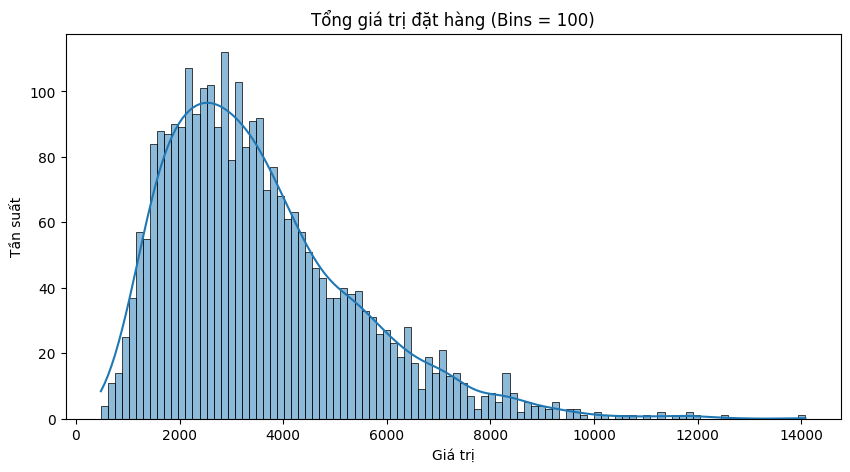

In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Giả sử df chứa dữ liệu với các cột liên quan
# df = pd.read_csv("data.csv")  # Nếu có file dữ liệu

def plot_histogram(data, title, bins=100):
    plt.figure(figsize=(10, 5))
    sns.histplot(data, bins=bins, kde=True)
    plt.title(title)
    plt.xlabel("Giá trị")
    plt.ylabel("Tần suất")
    plt.show()

# (a) Số lượng đặt hàng với số lượng bin là 100
plot_histogram(df['QUANTITYORDERED'], "Số lượng đặt hàng (Bins = 100)")

# (b) Đơn giá của sản phẩm với số lượng bin là 100
plot_histogram(df['Profit'], "Đơn giá của sản phẩm (Bins = 100)")

# (d) Tổng giá trị đặt hàng của đơn hàng với số lượng bin là 100
plot_histogram(df['SALES'], "Tổng giá trị đặt hàng (Bins = 100)")


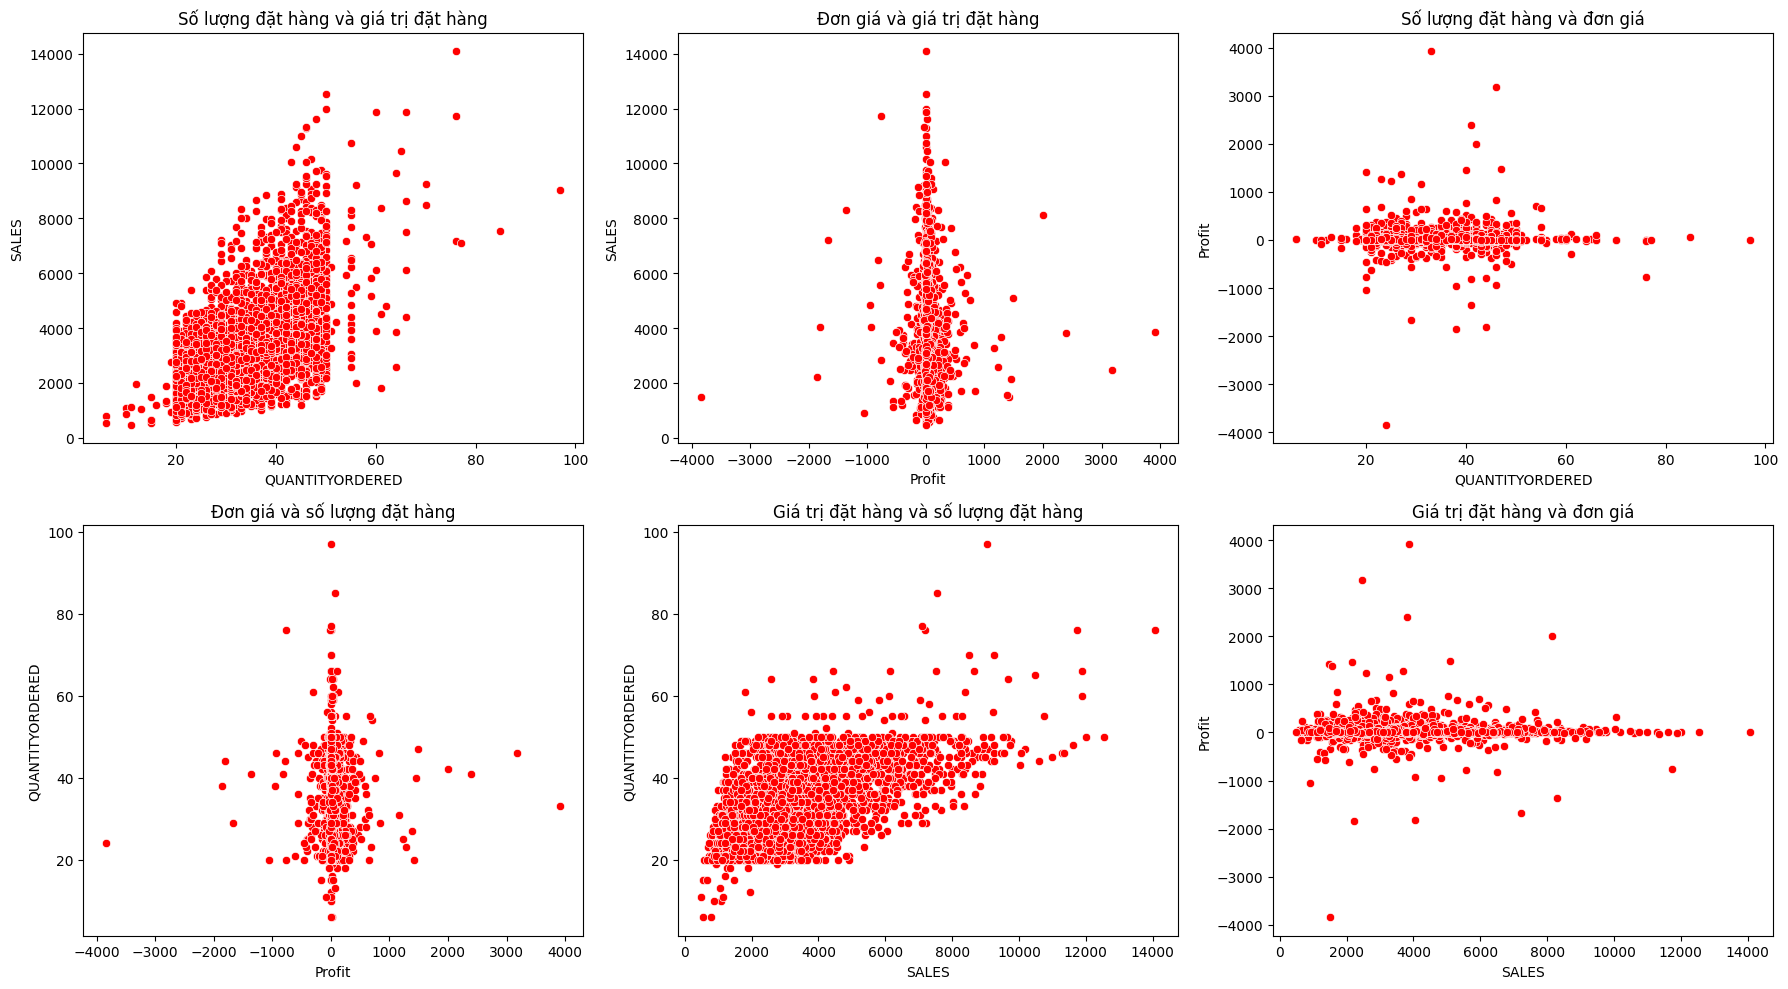

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Giả sử bạn có một DataFrame df với các cột: 
# QUANTITYORDERED (số lượng đặt hàng), 
# PRICEEACH (đơn giá), 
# SALES (giá trị đặt hàng)

# Tạo danh sách các cặp biến cần kiểm tra
relationships = [
    ("QUANTITYORDERED", "SALES", "Số lượng đặt hàng và giá trị đặt hàng"),
    ("Profit", "SALES", "Đơn giá và giá trị đặt hàng"),
    ("QUANTITYORDERED", "Profit", "Số lượng đặt hàng và đơn giá"),
    ("Profit", "QUANTITYORDERED", "Đơn giá và số lượng đặt hàng"),
    ("SALES", "QUANTITYORDERED", "Giá trị đặt hàng và số lượng đặt hàng"),
    ("SALES", "Profit", "Giá trị đặt hàng và đơn giá")
]

# Vẽ biểu đồ cho từng cặp biến
fig, axes = plt.subplots(2, 3, figsize=(18, 10))  # 2 hàng, 3 cột

for ax, (x_col, y_col, title) in zip(axes.flatten(), relationships):
    sns.scatterplot(data=df, x=x_col, y=y_col, ax=ax, color='red')
    ax.set_title(title)

plt.tight_layout()
plt.show()
